# ISIC 2024 Challenge

This notebook contains the data preparation, processing and modelling solution of the IsIcTeam2024 team.

2024 © IsIcTeam2024

Install extra dependencies.

In [ ]:
!pip install pytorch-lightning --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 27.9 MB/s eta 0:00:00


Download files from DropBox (zip) and unzip files from challenge data zip.

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/nd3x002tfqpvq9p7a5kar/isic-2024-challenge.zip?rlkey=rvr8qmbucjixcika1ivtfmg0x&st=uh84g4ip&dl=0' -O isic-2024-challenge.zip

--2024-11-22 11:57:39--  https://www.dropbox.com/scl/fi/nd3x002tfqpvq9p7a5kar/isic-2024-challenge.zip?rlkey=rvr8qmbucjixcika1ivtfmg0x&st=uh84g4ip&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc70a6f860091160bde464199dda.dl.dropboxusercontent.com/cd/0/inline/Ce2maCzsy3R5qOUfpHB2WT4egEKjZKvsU0tGxVRnXm2_b1Jjmpmi0_WFZJOQQO7HmtU2oJ5Fzb9qiVvzLMQmU0G6ZUyPOAL9ULaviyCYQi7G7z37UJMKQEYY_-mMo56TSzE1lSt0f_CNlZNLRazBFnUu/file# [following]
--2024-11-22 11:57:40--  https://uc70a6f860091160bde464199dda.dl.dropboxusercontent.com/cd/0/inline/Ce2maCzsy3R5qOUfpHB2WT4egEKjZKvsU0tGxVRnXm2_b1Jjmpmi0_WFZJOQQO7HmtU2oJ5Fzb9qiVvzLMQmU0G6ZUyPOAL9ULaviyCYQi7G7z37UJMKQEYY_-mMo56TSzE1lSt0f_CNlZNLRazBFnUu/file
Resolving uc70a6f860091160bde464199dda.dl.dropboxusercontent.com (uc70a6f860091160bde464199dda.dl.dropboxuserconte

In [ ]:
!unzip -o '/content/isic-2024-challenge.zip' -d /content/data

A streamkimeneten csak az utolsó 5000 sor látható.
  inflating: /content/data/train-image/image/ISIC_9874656.jpg  
  inflating: /content/data/train-image/image/ISIC_9874659.jpg  
  inflating: /content/data/train-image/image/ISIC_9874663.jpg  
  inflating: /content/data/train-image/image/ISIC_9874742.jpg  
  inflating: /content/data/train-image/image/ISIC_9874751.jpg  
  inflating: /content/data/train-image/image/ISIC_9874803.jpg  
  inflating: /content/data/train-image/image/ISIC_9874805.jpg  
  inflating: /content/data/train-image/image/ISIC_9874832.jpg  
  inflating: /content/data/train-image/image/ISIC_9874878.jpg  
  inflating: /content/data/train-image/image/ISIC_9874897.jpg  
  inflating: /content/data/train-image/image/ISIC_9874925.jpg  
  inflating: /content/data/train-image/image/ISIC_9874931.jpg  
  inflating: /content/data/train-image/image/ISIC_9874939.jpg  
  inflating: /content/data/train-image/image/ISIC_9874940.jpg  
  inflating: /content/data/train-image/image/ISIC_987

# Data prepare and visualisation

Import modules to visualize and preprocess data, use pandas to show metadata in table. Use cv2 to manipulate image.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
import cv2

Load the train data (we will use as a train/valid/test, because we don't have test dataset). The original test dataset contains only 3 element (we don't have the target value for them).

In [ ]:
BASE_PATH = '/content/data'
train_metadata = pd.read_csv(f'{BASE_PATH}/train-metadata.csv')
train_metadata.head()

<ipython-input-2-c2a95da5e96c>:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_metadata = pd.read_csv(f'{BASE_PATH}/train-metadata.csv')


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


Fill NA values with pandas.ffill method

In [ ]:
train_metadata.ffill(inplace=True)

In [ ]:
# Categorical features which will be one hot encoded
CATEGORICAL_COLUMNS = ["sex", "anatom_site_general",
            "tbp_tile_type","tbp_lv_location", ]

# Numeraical features which will be normalized
NUMERIC_COLUMNS = ["age_approx", "tbp_lv_nevi_confidence", "clin_size_long_diam_mm",
           "tbp_lv_areaMM2", "tbp_lv_area_perim_ratio", "tbp_lv_color_std_mean",
           "tbp_lv_deltaLBnorm", "tbp_lv_minorAxisMM", ]

# Tabular feature columns
FEAT_COLS = CATEGORICAL_COLUMNS + NUMERIC_COLUMNS

From categorical data we create dummies to encode them, we drop the first value from the dummies.

In [ ]:
train_metadata = train_metadata.loc[:, [*FEAT_COLS, 'target', 'patient_id', 'isic_id']]
train_metadata = pd.get_dummies(train_metadata, columns=CATEGORICAL_COLUMNS, drop_first=True)

In [ ]:
train_metadata.head()

,age_approx,tbp_lv_nevi_confidence,clin_size_long_diam_mm,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaLBnorm,tbp_lv_minorAxisMM,target,patient_id,...,tbp_lv_location_Right Leg - Lower,tbp_lv_location_Right Leg - Upper,tbp_lv_location_Torso Back,tbp_lv_location_Torso Back Bottom Third,tbp_lv_location_Torso Back Middle Third,tbp_lv_location_Torso Back Top Third,tbp_lv_location_Torso Front,tbp_lv_location_Torso Front Bottom Half,tbp_lv_location_Torso Front Top Half,tbp_lv_location_Unknown
0,60.0,2.628592e-03,3.04,3.152561,27.476170,0.00000,5.784302,1.543016,0,IP_1235828,...,False,True,False,False,False,False,False,False,False,False
1,60.0,1.334303e-07,1.10,0.919497,12.235290,0.00000,4.987244,0.821918,0,IP_8170065,...,False,False,False,False,False,False,False,False,False,False
2,60.0,2.959177e-04,3.40,3.265153,24.184620,0.00000,6.290359,1.194905,0,IP_6724798,...,False,False,False,False,False,True,False,False,False,False
3,65.0,2.198945e+01,3.22,6.079940,14.889242,0.51452,6.400196,2.481328,0,IP_4111386,...,False,False,False,False,False,False,False,False,True,False
4,55.0,1.378832e-03,2.73,2.101708,19.902560,0.00000,6.531302,0.929916,0,IP_8313778,...,False,False,False,False,False,False,False,False,True,False


Load and plot sample images from positive data.

In [ ]:
training_validation_hdf5 = h5py.File(f"{BASE_PATH}/train-image.hdf5", 'r')

Test to remove hair from images with [Squeeze algorithm](https://www.mdpi.com/2072-6694/15/1/12).

In [ ]:
def remove_hair(image, image_size=(224, 224), filter_size=(5, 5), threshold=5, max_value=255):
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filter_size)

  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  blackhat_img = cv2.morphologyEx(gray_image,cv2.MORPH_BLACKHAT, kernel)

  _, mask = cv2.threshold(blackhat_img, threshold, max_value, cv2.THRESH_BINARY)

  squeezed_image = cv2.inpaint(image, mask, 3, cv2.INPAINT_NS)

  resized_image = cv2.resize(squeezed_image, image_size, interpolation = cv2.INTER_CUBIC)
  return resized_image


Custom dataset to load image from hdf5 and concat with metadata and target value

In [ ]:
import torch

class Config:
  optimizer = torch.optim.Adam,
  fc1_layer_size = 256,
  fc2_layer_size = 128,
  learning_rate = 0.002,
  batch_size = 64

In [ ]:
from torch.utils.data import Dataset
import os
from PIL import Image


class Isic2024Dataset(Dataset):
    def __init__(self, metadata, targets, hdf5, transform=None, remove_hair=False):
        self.isic_ids = metadata.isic_id.values
        self.targets = targets
        self.metadata = metadata.drop(columns = ['isic_id']).values.astype(np.float32)
        self.hdf5 = hdf5
        self.transform = transform
        self.remove_hair = remove_hair

    def __len__(self):
        return len(self.isic_ids)

    def __getitem__(self, idx):
        image_string = self.hdf5[self.isic_ids[idx]][()]
        image_array = np.frombuffer(image_string, np.uint8)
        image_decoded = cv2.imdecode(image_array, cv2.IMREAD_COLOR)[..., ::-1]  # Convert BGR to RGB

        if self.remove_hair:
          image_decoded = remove_hair(image_decoded)

        image = Image.fromarray(image_decoded)

        if self.transform:
            image = self.transform(image)

        return {'image': image, 'metadata': self.metadata[idx], "labels": self.targets[idx]}

Create data module to handle train / val / test dataset during training and testing

In [ ]:
import pytorch_lightning as pl
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

class Isic2024DataModule(pl.LightningDataModule):
    def __init__(self, batch_size=Config.batch_size, remove_hair=False, image_size=(224, 224)):
        super().__init__()
        self.train_transform = T.Compose([
            T.Resize(image_size, antialias=True),
            T.RandomHorizontalFlip(),
            T.RandomVerticalFlip(),
            T.RandomRotation(degrees=(0, 180)),
            T.ToTensor(),
            T.Lambda(lambda x: (x * 2) - 1),
            T.RandomErasing(p=0.2),
        ])
        self.val_transform = T.Compose([
            T.Resize(image_size, antialias=True),
            T.ToTensor(),
            T.Lambda(lambda x: (x * 2) - 1),
        ])
        self.inverse_transform = T.Compose([
            T.Lambda(lambda t: (t + 1) / 2),
            T.Lambda(lambda t: t.permute(1, 2, 0)),
            T.Lambda(lambda t: t * 255.),
            T.Lambda(lambda t: t.cpu().numpy().astype(np.uint8)),
            T.ToPILImage(),
        ])

        self.batch_size = batch_size
        self.remove_hair = remove_hair

    def setup(self, stage=None):
        self.train_dataset = Isic2024Dataset(
            train_X, train_y, training_validation_hdf5, transform=self.train_transform, remove_hair=self.remove_hair
        )
        self.val_dataset = Isic2024Dataset(
            val_X, val_y, training_validation_hdf5, transform=self.val_transform, remove_hair=self.remove_hair
        )
        self.test_dataset = Isic2024Dataset(
            test_X, test_y, training_validation_hdf5, transform=self.val_transform, remove_hair=self.remove_hair
        )

    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            num_workers=2,
            pin_memory=True,
            drop_last=True,
            shuffle=True,
        )

    def val_dataloader(self):
        return DataLoader(
            self.val_dataset,
            batch_size=self.batch_size,
            num_workers=2,
            pin_memory=True,
        )

    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            num_workers=2,
            pin_memory=True,
        )

# **Mobilenet_v3 based model**

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from torchmetrics import ConfusionMatrix, AUROC, F1Score, Precision, Recall

We have implemented the same metrics used in the kaggle competition to evaluate the predictions submitted, which can be found [here](https://www.kaggle.com/code/metric/isic-pauc-abovetpr).
<br/>
<br/>

Quoted from the kaggle competition page:

"*The receiver operating characteristic (ROC) curve illustrates the diagnostic ability of a given binary classifier system as its discrimination threshold is varied. However, there are regions in the ROC space where the values of TPR are unacceptable in clinical practice. Systems that aid in diagnosing cancers are required to be highly-sensitive, so this metric focuses on the area under the ROC curve AND above 80% TRP. Hence, scores range from [0.0, 0.2].*"

<br/>
<br/>

We will therefore also use this metric to compare models.


In [ ]:
from torchmetrics import Metric
import torch

class pAUC(Metric):
    def __init__(self, min_tpr=0.8, **kwargs):
        super().__init__(**kwargs)
        self.min_tpr = min_tpr
        self.preds = []
        self.target = []

    def update(self, preds: torch.Tensor, target: torch.Tensor):
        self.preds.append(preds)
        self.target.append(target)

    def compute(self):
        preds = torch.cat(self.preds).cpu().numpy()
        target = torch.cat(self.target).cpu().numpy()

        # rescale the target. set 0s to 1s and 1s to 0s (since sklearn only has max_fpr)
        v_gt = abs(target - 1)
        # flip the submissions to their compliments
        v_pred = -1.0 * preds

        max_fpr = abs(1 - self.min_tpr)

        # using sklearn.metric functions: (1) roc_curve and (2) auc
        fpr, tpr, _ = roc_curve(v_gt, v_pred, sample_weight=None)
        if max_fpr is None or max_fpr == 1:
            return auc(fpr, tpr)
        if max_fpr <= 0 or max_fpr > 1:
            return -1

        # Add a single point at max_fpr by linear interpolation
        stop = np.searchsorted(fpr, max_fpr, "right")
        x_interp = [fpr[stop - 1], fpr[stop]]
        y_interp = [tpr[stop - 1], tpr[stop]]
        tpr = np.append(tpr[:stop], np.interp(max_fpr, x_interp, y_interp))
        fpr = np.append(fpr[:stop], max_fpr)
        partial_auc = auc(fpr, tpr)
        self.preds.clear()
        self.target.clear()
        return partial_auc

The basic logistic regression model. <br>
During model training and validation, only the loss function is logged out. When we evaluate test data set, we log the metrics that are valid on unbalanced data set (it is based on [this paper](https://machinelearningmastery.com/5-effective-ways-to-handle-imbalanced-data-in-machine-learning/)). These are:
 * **AUROC** (partial AUC, that the kaggle competition used too)
 * **F1 score**
 * **Precision**
 * Recall
 * Confusion matrix: for visually see the classification

In [ ]:
import torchvision.models as models
from torch import nn
import torch

In [ ]:
class CustomIsIcModule(pl.LightningModule):
    def __init__(self, model):
        super().__init__()
        self.save_hyperparameters()
        self.model = model

        self.BCE = torch.nn.BCELoss()
        self.cm = ConfusionMatrix(task="binary", num_classes=2)
        self.aucroc = AUROC(task="binary", num_classes=2)
        self.f1 = F1Score(task="binary", num_classes=2)
        self.precision = Precision(task="binary", num_classes=2)
        self.recall = Recall(task="binary", num_classes=2)
        self.pAUC = pAUC()

    def forward(self, x):
        out = self.model(x)
        out = torch.nn.functional.sigmoid(out)
        return out

    def training_step(self, batch, batch_idx):
        pred_labels = self.forward(batch['image'])
        loss = self.BCE(pred_labels, batch['labels'].unsqueeze(1).to(torch.float32))
        self.log('train_loss', loss, prog_bar=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        pred_labels = self.forward(batch['image'])
        reshaped_batch = batch['labels'].unsqueeze(1).to(torch.float32)
        loss = self.BCE(pred_labels, reshaped_batch)
        self.pAUC.update(pred_labels, reshaped_batch)
        self.log('val_loss', loss, prog_bar=True, on_epoch=True)
        return loss

    def on_validation_epoch_end(self) -> None:
        self.log('val_pAUC', self.pAUC.compute(), prog_bar=True, on_epoch=True)
        return super().on_validation_epoch_end()

    def test_step(self, batch, batch_idx):
        pred_labels = self.forward(batch['image'])
        reshaped_batch = batch['labels'].unsqueeze(1).to(torch.float32)
        self.cm.update(pred_labels, reshaped_batch)
        self.aucroc.update(pred_labels, reshaped_batch)
        self.f1.update(pred_labels, reshaped_batch)
        self.precision.update(pred_labels, reshaped_batch)
        self.recall.update(pred_labels, reshaped_batch)
        self.pAUC.update(pred_labels, reshaped_batch)
        loss = self.BCE(pred_labels, reshaped_batch)
        self.log('test_loss', loss, prog_bar=True, on_epoch=True)
        return loss

    def on_test_epoch_end(self) -> None:
        self.cm.plot()
        self.log('test_auc_roc', self.aucroc.compute(), prog_bar=True, on_epoch=True)
        self.log('test_f1', self.f1.compute(), prog_bar=True, on_epoch=True)
        self.log('test_precision', self.precision.compute(), prog_bar=True, on_epoch=True)
        self.log('test_recall', self.recall.compute(), prog_bar=True, on_epoch=True)
        self.log('test_pAUC', self.pAUC.compute(), prog_bar=True, on_epoch=True)
        return super().on_test_epoch_end()

    def configure_optimizers(self):
        return Config.optimizer(self.parameters(), lr=Config.learning_rate)

We saved some logs during train, validation and test for visualization, and here we plot them.

# Hyper parameter optimalization

In [ ]:
import wandb

In [ ]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: nemes-attila (nemes-attila-budapesti-m-szaki-s-gazdas-gtudom-nyi-egyetem). Use `wandb login --relogin` to force relogin


True

In [ ]:
sweep_config = {
    'method': 'random'
}

In [ ]:
parameters_dict = {
    'optimizer': {
        'values': ['adam', 'sgd', 'adamW']
    },
    'fc1_layer_size': {
        'values': [128, 256, 512]
    },
    'fc2_layer_size': {
        'values': [128, 256, 512]
    }
}

parameters_dict.update({
    'learning_rate': {
        'distribution': 'uniform',
        'min': 0,
        'max': 0.1
      },
    'batch_size': {
        'distribution': 'q_log_uniform_values',
        'q': 8,
        'min': 64,
        'max': 512
      }
   }
)

sweep_config['parameters'] = parameters_dict

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="isic_logs")

Create sweep with ID: j86s5j58
Sweep URL: https://wandb.ai/nemes-attila-budapesti-m-szaki-s-gazdas-gtudom-nyi-egyetem/isic_logs/sweeps/j86s5j58


# Cross validation

In [ ]:
# Define test dataset for cross validation
test_val_size = 75
positive_df = train_metadata[train_metadata.target == 1].sample(frac=1).reset_index(drop=True)
negative_df = train_metadata[train_metadata.target == 0].sample(frac=1).reset_index(drop=True)
positive_test = positive_df.sample(test_val_size, random_state=42).reset_index(drop=True)
negative_test = negative_df.sample(test_val_size, random_state=42).reset_index(drop=True)
test_df = pd.concat([positive_test, negative_test], axis=0).sample(frac=1.0)
test_X = test_df.drop(columns=['target', 'patient_id'])
test_y = test_df.target.values

In [ ]:
# Remove test data from dataset
positive_train_val = positive_df[~positive_df.isic_id.isin(positive_test.isic_id)]
negative_train_val = negative_df[~negative_df.isic_id.isin(negative_test.isic_id)]

In [ ]:
def split_train_val(positive_train_val, negative_train_val, test_val_size, start_index=0, random_state=42):
  positive_val = positive_train_val.iloc[start_index : start_index + test_val_size, :]
  negative_val = negative_train_val.iloc[start_index : start_index + test_val_size, :]

  positive_train = positive_train_val[~positive_train_val.isic_id.isin(positive_val.isic_id)].sample(frac=6.0, replace=True, random_state=random_state)
  negative_train = negative_train_val[~negative_train_val.isic_id.isin(negative_val.isic_id)].sample(frac=0.0075, random_state=random_state)

  val_df = pd.concat([positive_val, negative_val], axis=0).sample(frac=1.0)
  train_df = pd.concat([positive_train, negative_train], axis=0).sample(frac=1.0)

  train_X = train_df.drop(columns=['target', 'patient_id'])
  train_y = train_df.target.values

  val_X = val_df.drop(columns=['target', 'patient_id'])
  val_y = val_df.target.values

  return train_X, train_y, val_X, val_y

In [ ]:
def prepare_data_module(batch_size=Config.batch_size,remove_hair=False):
  data_module = Isic2024DataModule(batch_size=batch_size,remove_hair=remove_hair)
  data_module.prepare_data()
  data_module.setup()
  return data_module

In [ ]:
def get_model():
  return nn.Sequential(
      models.mobilenet_v3_small(pretrained=True).features,
      nn.AdaptiveAvgPool2d((1, 1)),
      nn.Flatten(),
      nn.Dropout(0.2),
      nn.Linear(576, Config.fc1_layer_size),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.Linear(Config.fc1_layer_size, Config.fc2_layer_size),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.Linear(Config.fc2_layer_size, 1)
  )

In [ ]:
optimizer_map = {
    'adam': torch.optim.Adam,
    'sgd': torch.optim.SGD,
    'adamW': torch.optim.AdamW
}

def train(config=None):
  with wandb.init(config=config):
    config = wandb.config
    global train_X, train_y, val_X, val_y
    train_X, train_y, val_X, val_y = split_train_val(positive_train_val, negative_train_val, test_val_size)
    loader = prepare_data_module(config.batch_size)

    Config.fc1_layer_size = config.fc1_layer_size
    Config.fc2_layer_size = config.fc2_layer_size
    Config.learning_rate = config.learning_rate
    Config.optimizer = optimizer_map[config.optimizer]

    network = CustomIsIcModule(get_model())

    wandb_logger = pl.loggers.WandbLogger(log_model="all", project="isic_logs", job_type='train')
    model_cpkt = pl.callbacks.ModelCheckpoint(
        monitor='val_pAUC',
        mode='max',
        save_top_k=1,
        save_last=True,
        dirpath='mobilenet_v3',
        filename='best_model')

    early_stopping = pl.callbacks.EarlyStopping(
        monitor='val_pAUC',
        mode='max',
        patience=10,
        verbose=True,
    )
    trainer = pl.Trainer(max_epochs=20,
                      callbacks=[model_cpkt, early_stopping],
                      logger=wandb_logger
                      )
    trainer.fit(network, loader)

In [ ]:
wandb.agent(sweep_id, train, count=20)
wandb.teardown()

wandb: Agent Starting Run: lbl6wioc with config:
wandb: 	batch_size: 128
wandb: 	fc1_layer_size: 256
wandb: 	fc2_layer_size: 128
wandb: 	learning_rate: 0.03237859451924629
wandb: 	optimizer: adamW


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (34) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.025 >= min_delta = 0.0. New best score: 0.045


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.019 >= min_delta = 0.0. New best score: 0.064


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.030 >= min_delta = 0.0. New best score: 0.094


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.004 >= min_delta = 0.0. New best score: 0.098


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.004 >= min_delta = 0.0. New best score: 0.102


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.008 >= min_delta = 0.0. New best score: 0.110


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
train_loss_epoch,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss_step,▇▆▅▅▃▄▂█▅▁▁▄▂
trainer/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
val_loss,███▂▇▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▁▁▁▁▃▅▇▂▅▇▇▆▄▆▇█▅▇▆█
epoch,19
train_loss_epoch,0.40633
train_loss_step,0.37463
trainer/global_step,679
val_loss,0.50727


wandb: Agent Starting Run: 19w1fmai with config:
wandb: 	batch_size: 88
wandb: 	fc1_layer_size: 128
wandb: 	fc2_layer_size: 128
wandb: 	learning_rate: 0.06600800363980662
wandb: 	optimizer: sgd


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.027


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.011 >= min_delta = 0.0. New best score: 0.038


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.034 >= min_delta = 0.0. New best score: 0.073


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.021 >= min_delta = 0.0. New best score: 0.094


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.023 >= min_delta = 0.0. New best score: 0.117


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.004 >= min_delta = 0.0. New best score: 0.121


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.006 >= min_delta = 0.0. New best score: 0.127


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.016 >= min_delta = 0.0. New best score: 0.142


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.002 >= min_delta = 0.0. New best score: 0.145


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇███
train_loss_epoch,█▇▅▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
train_loss_step,█▆▃▄▃▅▃▃▂▃▃▄▄▃▂▂▂▃▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇█
val_loss,▁▂▅▄▁▂▆▆▄▁▂▃▆▃▅▃▅█▃▃
val_pAUC,▁▂▄▅▆▇▇▅▇▇█▇▆█▇██▇▇█
epoch,19
train_loss_epoch,0.10665
train_loss_step,0.07337
trainer/global_step,999
val_loss,1.06273


wandb: Agent Starting Run: q4g25cy5 with config:
wandb: 	batch_size: 144
wandb: 	fc1_layer_size: 128
wandb: 	fc2_layer_size: 256
wandb: 	learning_rate: 0.02901474712425585
wandb: 	optimizer: adam


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.012 >= min_delta = 0.0. New best score: 0.032


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.014 >= min_delta = 0.0. New best score: 0.046


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.008 >= min_delta = 0.0. New best score: 0.054


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.033 >= min_delta = 0.0. New best score: 0.087


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.002 >= min_delta = 0.0. New best score: 0.089


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.001 >= min_delta = 0.0. New best score: 0.090


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█████
train_loss_epoch,█▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss_step,▂█▂▂▂▂▁▂▂▁▅▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇███
val_loss,███▄▄▇▃▂▃▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▁▁▁▂▁▁▂▄▃▄████▆█▅▃▇▇
epoch,19
train_loss_epoch,0.46861
train_loss_step,0.30978
trainer/global_step,599
val_loss,1.62248


wandb: Agent Starting Run: 10cesi31 with config:
wandb: 	batch_size: 248
wandb: 	fc1_layer_size: 512
wandb: 	fc2_layer_size: 128
wandb: 	learning_rate: 0.08099659748674268
wandb: 	optimizer: adam


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (17) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_pAUC did not improve in the last 10 records. Best score: 0.020. Signaling Trainer to stop.


epoch,▁▁▂▂▂▂▂▃▃▄▄▅▅▅▅▅▆▆▇▇▇▇▇██
train_loss_epoch,▁▇▇█▆█▇▇▆▆▇
train_loss_step,▅█▁
trainer/global_step,▁▁▂▂▂▂▂▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
val_loss,▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▁▁▁▁▁▁▁▁▁▁▁
epoch,10
train_loss_epoch,32.61385
train_loss_step,33.06451
trainer/global_step,186
val_loss,50


wandb: Agent Starting Run: aplg8iib with config:
wandb: 	batch_size: 88
wandb: 	fc1_layer_size: 128
wandb: 	fc2_layer_size: 512
wandb: 	learning_rate: 0.08610654768181733
wandb: 	optimizer: sgd


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.047


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.023 >= min_delta = 0.0. New best score: 0.070


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.004 >= min_delta = 0.0. New best score: 0.074


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.039 >= min_delta = 0.0. New best score: 0.113


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.000 >= min_delta = 0.0. New best score: 0.113


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.019 >= min_delta = 0.0. New best score: 0.133


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_pAUC did not improve in the last 10 records. Best score: 0.133. Signaling Trainer to stop.


epoch,▁▁▁▁▁▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇████
train_loss_epoch,█▆▄▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
train_loss_step,█▇▆▄▄▄▃▃▃▂▆▂▂▁▃▂▂▂▂
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇█████
val_loss,▂▂▃▂▇▆▆▆▆▅▁▄▅▆█▄▅▄▅
val_pAUC,▁▃▃▆▆▅▅▆█▇██▆█▅▆▇█▇
epoch,18
train_loss_epoch,0.09686
train_loss_step,0.07634
trainer/global_step,949
val_loss,1.15389


wandb: Agent Starting Run: 51lh0akf with config:
wandb: 	batch_size: 168
wandb: 	fc1_layer_size: 128
wandb: 	fc2_layer_size: 256
wandb: 	learning_rate: 0.010506721751608696
wandb: 	optimizer: adamW


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (26) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.031


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.001 >= min_delta = 0.0. New best score: 0.032


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.052 >= min_delta = 0.0. New best score: 0.084


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.009 >= min_delta = 0.0. New best score: 0.093


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.028 >= min_delta = 0.0. New best score: 0.122


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.003 >= min_delta = 0.0. New best score: 0.125


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_loss_epoch,█▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▂▁▁▁
train_loss_step,█▆▄▅▅▃▃▄▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,▇████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▂▁▁▂▁▅▄▆█▇▇▇▅▄▃▄▆█▅▇
epoch,19
train_loss_epoch,0.23928
train_loss_step,0.21822
trainer/global_step,519
val_loss,0.87275


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: hrd9kh1o with config:
wandb: 	batch_size: 192
wandb: 	fc1_layer_size: 256
wandb: 	fc2_layer_size: 256
wandb: 	learning_rate: 0.019247082378449146
wandb: 	optimizer: adamW


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (23) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.012 >= min_delta = 0.0. New best score: 0.032


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.050 >= min_delta = 0.0. New best score: 0.082


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.002 >= min_delta = 0.0. New best score: 0.084


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.011 >= min_delta = 0.0. New best score: 0.095


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.017 >= min_delta = 0.0. New best score: 0.112


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.011 >= min_delta = 0.0. New best score: 0.123


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
train_loss_epoch,█▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss_step,▄▆▇▅▅▆▂▁█
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇████
val_loss,████▃▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▁▁▁▂▅▅▆▄▇▄▅▆▄▇█▆▇█▇▆
epoch,19
train_loss_epoch,0.29087
train_loss_step,0.36403
trainer/global_step,459
val_loss,1.69486


wandb: Agent Starting Run: clkanb3h with config:
wandb: 	batch_size: 208
wandb: 	fc1_layer_size: 512
wandb: 	fc2_layer_size: 512
wandb: 	learning_rate: 0.08334043388657494
wandb: 	optimizer: adam


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (21) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_pAUC did not improve in the last 10 records. Best score: 0.020. Signaling Trainer to stop.


epoch,▁▁▂▂▂▂▂▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇▇██
train_loss_epoch,▁▇▇█▇█▇█▇▇█
train_loss_step,▆█▁▁
trainer/global_step,▁▁▂▂▂▂▂▃▃▄▄▄▅▅▅▅▅▆▆▇▇▇▇▇██
val_loss,▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▁▁▁▁▁▁▁▁▁▁▁
epoch,10
train_loss_epoch,32.78388
train_loss_step,29.80769
trainer/global_step,230
val_loss,50


wandb: Agent Starting Run: 1uangw1r with config:
wandb: 	batch_size: 248
wandb: 	fc1_layer_size: 512
wandb: 	fc2_layer_size: 512
wandb: 	learning_rate: 0.04044017701114253
wandb: 	optimizer: adamW


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (17) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_pAUC did not improve in the last 10 records. Best score: 0.020. Signaling Trainer to stop.


epoch,▁▁▂▂▂▂▂▃▃▄▄▅▅▅▅▅▆▆▇▇▇▇▇██
train_loss_epoch,▁▇▇▇▇▇▇█▇▇▇
train_loss_step,█▅▁
trainer/global_step,▁▁▂▂▂▂▂▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
val_loss,▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▁▁▁▁▁▁▁▁▁▁▁
epoch,10
train_loss_epoch,32.66129
train_loss_step,29.03226
trainer/global_step,186
val_loss,50


wandb: Agent Starting Run: iic6lq65 with config:
wandb: 	batch_size: 104
wandb: 	fc1_layer_size: 128
wandb: 	fc2_layer_size: 128
wandb: 	learning_rate: 0.05627125483068462
wandb: 	optimizer: adam


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (42) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_pAUC did not improve in the last 10 records. Best score: 0.020. Signaling Trainer to stop.


epoch,▁▁▂▂▂▂▂▂▃▃▃▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇▇███
train_loss_epoch,▁▅▇▇▆▇▇▆▇█▇
train_loss_step,▆▆█▃▇▁▂▇█
trainer/global_step,▁▁▁▂▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇███
val_loss,▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▁▁▁▁▁▁▁▁▁▁▁
epoch,10
train_loss_epoch,32.76099
train_loss_step,38.46154
trainer/global_step,461
val_loss,50.0


wandb: Agent Starting Run: a9tr3cwi with config:
wandb: 	batch_size: 184
wandb: 	fc1_layer_size: 512
wandb: 	fc2_layer_size: 512
wandb: 	learning_rate: 0.024001817980330745
wandb: 	optimizer: adamW


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_pAUC did not improve in the last 10 records. Best score: 0.020. Signaling Trainer to stop.


epoch,▁▁▂▂▂▂▂▃▃▄▄▄▅▅▅▅▅▆▆▇▇▇▇▇███
train_loss_epoch,▁▇█▇█▇█▇▇██
train_loss_step,▅▂█▁▅
trainer/global_step,▁▁▂▂▂▂▂▃▃▃▄▄▅▅▅▅▅▆▆▆▇▇▇▇███
val_loss,▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▁▁▁▁▁▁▁▁▁▁▁
epoch,10
train_loss_epoch,32.78986
train_loss_step,33.15218
trainer/global_step,263
val_loss,50


wandb: Agent Starting Run: fw8p11li with config:
wandb: 	batch_size: 344
wandb: 	fc1_layer_size: 512
wandb: 	fc2_layer_size: 128
wandb: 	learning_rate: 0.07524720555782365
wandb: 	optimizer: sgd


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (12) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.009


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.012 >= min_delta = 0.0. New best score: 0.022


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.013 >= min_delta = 0.0. New best score: 0.035


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.014 >= min_delta = 0.0. New best score: 0.049


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.011 >= min_delta = 0.0. New best score: 0.060


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.006 >= min_delta = 0.0. New best score: 0.066


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.001 >= min_delta = 0.0. New best score: 0.066


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.029 >= min_delta = 0.0. New best score: 0.095


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.020 >= min_delta = 0.0. New best score: 0.115


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_loss_epoch,█▇▇▇▆▆▅▄▃▃▂▂▂▂▂▂▁▁▁▁
train_loss_step,█▄▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
val_loss,▁▁▁▁▁▁▁▁▂▃▄▁▃█▅▇▅▄▄▃
val_pAUC,▁▂▃▄▄▄▃▃▂▃▄▄▅▅▇█▇█▇▇
epoch,19
train_loss_epoch,0.21126
train_loss_step,0.24103
trainer/global_step,239
val_loss,0.98077


wandb: Agent Starting Run: e7puzxkt with config:
wandb: 	batch_size: 72
wandb: 	fc1_layer_size: 512
wandb: 	fc2_layer_size: 256
wandb: 	learning_rate: 0.05896083966428711
wandb: 	optimizer: sgd


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.039


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.001 >= min_delta = 0.0. New best score: 0.040


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.007 >= min_delta = 0.0. New best score: 0.046


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.063 >= min_delta = 0.0. New best score: 0.109


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.038 >= min_delta = 0.0. New best score: 0.147


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_pAUC did not improve in the last 10 records. Best score: 0.147. Signaling Trainer to stop.


epoch,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
train_loss_epoch,█▇▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁
train_loss_step,█▇▆▄▅▅▃▃▅▅▃▂▃▂▄▃▃▁▂▂
trainer/global_step,▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
val_loss,▂▄▃█▃█▃▇▁▇▄▃▃▇▃▃▅
val_pAUC,▁▁▂▁▆▅█▆█▆▆▇▇▆▇▅▆
epoch,16
train_loss_epoch,0.12864
train_loss_step,0.09504
trainer/global_step,1036
val_loss,1.16618


wandb: Agent Starting Run: t9ekx8rs with config:
wandb: 	batch_size: 112
wandb: 	fc1_layer_size: 512
wandb: 	fc2_layer_size: 128
wandb: 	learning_rate: 0.031747885201359786
wandb: 	optimizer: adamW


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (39) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.012 >= min_delta = 0.0. New best score: 0.032


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.000 >= min_delta = 0.0. New best score: 0.032


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


epoch,▁▁▁▁▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇███
train_loss_epoch,█▂▅▅▁▁▁▁▂▃▄▄▄▂▁▁▁▁▁▁
train_loss_step,▅▇▅▁▁▁▂█▂▇▂▁▁▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇██
val_loss,████▁▁▁▁▁██▄▄█▁▁▁▁▁▁
val_pAUC,▁▁▁▁▁▁▁▁█▁▁▂█▁▁▁▁▁▁▁
epoch,19
train_loss_epoch,0.63189
train_loss_step,0.6465
trainer/global_step,779
val_loss,0.77218


wandb: Agent Starting Run: 23np1r3d with config:
wandb: 	batch_size: 112
wandb: 	fc1_layer_size: 512
wandb: 	fc2_layer_size: 128
wandb: 	learning_rate: 0.09708906735476092
wandb: 	optimizer: adam


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (39) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_pAUC did not improve in the last 10 records. Best score: 0.020. Signaling Trainer to stop.


epoch,▁▁▂▂▂▂▂▂▃▃▃▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇▇███
train_loss_epoch,▁█▄▆▅▇▇█▆▇▄
train_loss_step,█▁▅▃▇▆▁▆
trainer/global_step,▁▁▁▂▂▂▂▂▃▃▃▄▄▄▄▄▅▅▅▆▆▆▇▇▇▇▇▇██
val_loss,▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▁▁▁▁▁▁▁▁▁▁▁
epoch,10
train_loss_epoch,32.39469
train_loss_step,35.71429
trainer/global_step,428
val_loss,50.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0acc8y6i with config:
wandb: 	batch_size: 96
wandb: 	fc1_layer_size: 512
wandb: 	fc2_layer_size: 512
wandb: 	learning_rate: 0.05297416776955665
wandb: 	optimizer: sgd


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (46) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.037


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.012 >= min_delta = 0.0. New best score: 0.049


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.006 >= min_delta = 0.0. New best score: 0.055


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.010 >= min_delta = 0.0. New best score: 0.065


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.041 >= min_delta = 0.0. New best score: 0.105


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.008 >= min_delta = 0.0. New best score: 0.113


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.018 >= min_delta = 0.0. New best score: 0.131


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.006 >= min_delta = 0.0. New best score: 0.136


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.004 >= min_delta = 0.0. New best score: 0.140


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


epoch,▁▁▂▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██
train_loss_epoch,█▇▆▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
train_loss_step,█▇▆▃▃▄▄▃▂▃▃▂▂▂▃▁▂▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
val_loss,▂▂▂▂▆▃▄▃█▂▄▁▄▄▆▄▅▃▇▆
val_pAUC,▁▂▂▃▆▆▆▆▆▇█▇▇▇▇███▇█
epoch,19
train_loss_epoch,0.11493
train_loss_step,0.05955
trainer/global_step,919
val_loss,1.25332


wandb: Agent Starting Run: 2opk5tbp with config:
wandb: 	batch_size: 120
wandb: 	fc1_layer_size: 256
wandb: 	fc2_layer_size: 128
wandb: 	learning_rate: 0.09639768734122732
wandb: 	optimizer: adamW


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (37) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_pAUC did not improve in the last 10 records. Best score: 0.020. Signaling Trainer to stop.


epoch,▁▁▂▂▂▂▂▂▃▃▄▄▄▅▅▅▅▅▅▆▆▇▇▇▇▇▇███
train_loss_epoch,▁█▇▇▇▇▇█▇▇█
train_loss_step,▆█▁▆▃▄▃▆
trainer/global_step,▁▁▁▂▂▂▂▂▃▃▃▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇███
val_loss,▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▁▁▁▁▁▁▁▁▁▁▁
epoch,10
train_loss_epoch,32.72522
train_loss_step,31.66667
trainer/global_step,406
val_loss,50


wandb: Agent Starting Run: bz3x831x with config:
wandb: 	batch_size: 160
wandb: 	fc1_layer_size: 128
wandb: 	fc2_layer_size: 128
wandb: 	learning_rate: 0.007006592759271724
wandb: 	optimizer: adamW


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (27) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.019


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.048 >= min_delta = 0.0. New best score: 0.067


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.034 >= min_delta = 0.0. New best score: 0.102


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.005 >= min_delta = 0.0. New best score: 0.106


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.010 >= min_delta = 0.0. New best score: 0.117


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.001 >= min_delta = 0.0. New best score: 0.118


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.007 >= min_delta = 0.0. New best score: 0.125


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.018 >= min_delta = 0.0. New best score: 0.143


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
train_loss_epoch,█▅▄▄▃▃▃▃▃▃▃▂▂▂▁▁▂▂▁▁
train_loss_step,█▃▅▄▃▁▂▁▃▃
trainer/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇███
val_loss,█▂▂▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▁▄▆▃▅▃▄▆▃▅▇▅▄▇▅▅▄▇█▇
epoch,19
train_loss_epoch,0.16028
train_loss_step,0.21937
trainer/global_step,539
val_loss,1.6111


wandb: Agent Starting Run: kavprfxa with config:
wandb: 	batch_size: 280
wandb: 	fc1_layer_size: 256
wandb: 	fc2_layer_size: 256
wandb: 	learning_rate: 0.040919906278843246
wandb: 	optimizer: adam


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (15) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_pAUC did not improve in the last 10 records. Best score: 0.020. Signaling Trainer to stop.


epoch,▁▁▂▂▂▂▃▃▃▄▄▅▅▅▅▅▆▆▇▇▇▇▇██
train_loss_epoch,▁▇▆▇▇▇█▇▇▇▇
train_loss_step,█▁▂
trainer/global_step,▁▁▂▂▂▂▃▃▃▄▄▅▅▅▅▅▆▆▇▇▇▇▇██
val_loss,▁▁▁▁▁▁▁▁▁▁▁
val_pAUC,▁▁▁▁▁▁▁▁▁▁▁
epoch,10
train_loss_epoch,32.61905
train_loss_step,29.28572
trainer/global_step,164
val_loss,50


wandb: Agent Starting Run: e8by8axs with config:
wandb: 	batch_size: 400
wandb: 	fc1_layer_size: 256
wandb: 	fc2_layer_size: 256
wandb: 	learning_rate: 0.01117255543913366
wandb: 	optimizer: adamW


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (11) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved. New best score: 0.019


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.001 >= min_delta = 0.0. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.017 >= min_delta = 0.0. New best score: 0.037


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.001 >= min_delta = 0.0. New best score: 0.038


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.022 >= min_delta = 0.0. New best score: 0.060


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.002 >= min_delta = 0.0. New best score: 0.062


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.007 >= min_delta = 0.0. New best score: 0.069


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.006 >= min_delta = 0.0. New best score: 0.074


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.005 >= min_delta = 0.0. New best score: 0.079


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_pAUC improved by 0.012 >= min_delta = 0.0. New best score: 0.091


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
train_loss_epoch,█▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
train_loss_step,█▅▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇███
val_loss,█████▃▄▂▄▂▂▁▁▁▁▁▁▁▁▁
val_pAUC,▁▁▁▁▁▃▃▅▃▅▆▃▆▃▄▃▇█▅▆
epoch,19
train_loss_epoch,0.24054
train_loss_step,0.21899
trainer/global_step,219
val_loss,4.00238


In [ ]:
for i in range(0, len(positive_train_val), test_val_size):

  train_X, train_y, val_X, val_y = split_train_val(positive_train_val, negative_train_val, test_val_size, start_index=i)

  data_module = prepare_data_module(remove_hair=False)

  model = CustomIsIcModule(model=get_model())

  model_cpkt = pl.callbacks.ModelCheckpoint(
    monitor='val_pAUC',
    mode='max',
    save_top_k=1,
    save_last=True,
    dirpath='mobilenet_v3',
    filename='best_model-v5')

  trainer = pl.Trainer(
    max_epochs=20,
    accelerator='gpu' if torch.cuda.is_available() else 'cpu',
    devices=1,
    logger=pl.loggers.tensorboard.TensorBoardLogger(save_dir='logs/', name='mobilenet_v3'),
    log_every_n_steps=1,
    callbacks=[model_cpkt]
    )

  trainer.fit(model, datamodule=data_module)

  best_model = CustomIsIcModule.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)

  trainer.test(best_model, datamodule=data_module)
  break

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:
Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_auc_roc        │    0.9192888736724854     │
│          test_f1          │    0.7894737124443054     │
│         test_loss         │    0.5746259689331055     │
│         test_pAUC         │    0.15199999511241913    │
│      test_precision       │    0.6521739363670349     │
│        test_recall        │            1.0            │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.5746259689331055,
  'test_auc_roc': 0.9192888736724854,
  'test_f1': 0.7894737124443054,
  'test_precision': 0.6521739363670349,
  'test_recall': 1.0,
  'test_pAUC': 0.15199999511241913}]

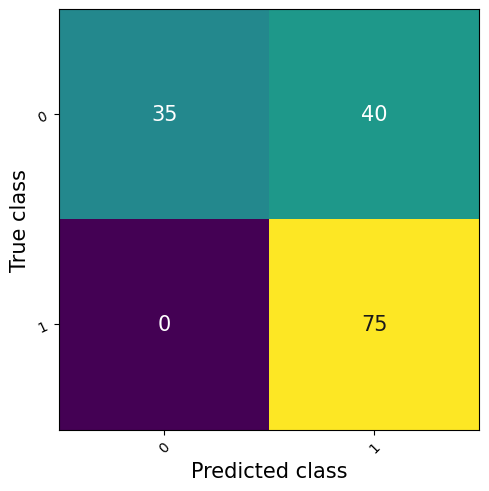

In [ ]:
best_model_path = f"/content/mobilenet_v3/best_model-v4.ckpt"
best_model = CustomIsIcModule.load_from_checkpoint(best_model_path)
trainer.test(best_model, datamodule=data_module)